[nltk_data] Downloading package punkt to /Users/amitlevi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amitlevi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


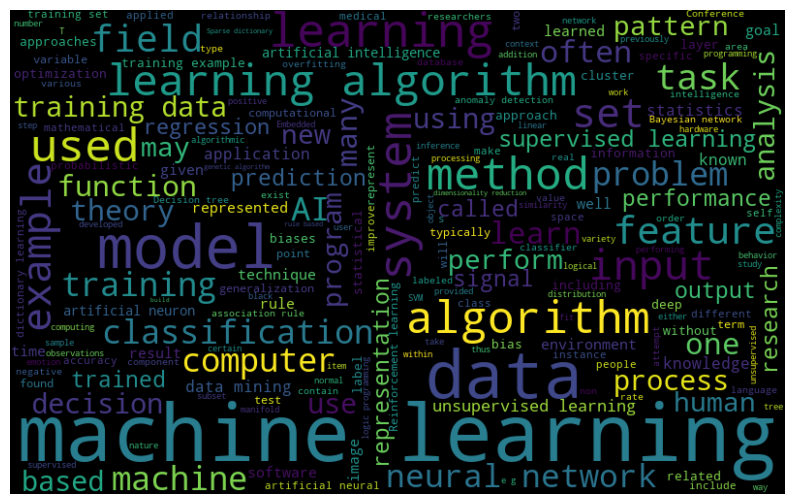

In [28]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import nltk
import wikipediaapi
import pandas as pd
import plotly.express as px
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
from sklearn.manifold import TSNE
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, roc_curve, auc
from gensim.models import Word2Vec

nltk.download('punkt')
nltk.download('stopwords')

# Setup Wikipedia
wiki_wiki = wikipediaapi.Wikipedia('en')


def fetch_data(topic):
    """
    Fetches data from a Wikipedia page.

    Parameters:
    topic (str): Topic to fetch data from Wikipedia.

    Returns:
    list: List of sentences in the Wikipedia page.
    """
    # Get Wikipedia page based on the topic provided
    page_py = wiki_wiki.page(topic)

    # Get the text content of the page
    documents = nltk.sent_tokenize(page_py.text)

    return documents


def wordcloud_viz(documents):
    """
    Generate a wordcloud based on the input documents.

    Parameters:
    documents (list): List of sentences to be visualized.

    Returns:
    None, but displays a wordcloud of the input sentences.
    """
    words = ' '.join([doc for doc in documents])
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()


def histogram_viz(documents):
    """
    Generate a histogram based on the word frequency in the input documents.

    Parameters:
    documents (list): List of sentences to be visualized.

    Returns:
    None, but displays a histogram of word frequency of the input sentences.
    """
    words = [word for word in word_tokenize(' '.join(documents)) if word.isalnum()]
    freq_dist = nltk.FreqDist(words)
    freq_df = pd.DataFrame(list(freq_dist.items()), columns=["Word", "Frequency"])
    fig = px.histogram(freq_df, x="Word", y="Frequency", nbins=20, title="Word Frequency Histogram")
    fig.show()


def tsne_viz(documents):
    """
    Perform t-SNE visualization on the input documents.

    Parameters:
    documents (list): List of sentences to be visualized.

    Returns:
    None, but displays a t-SNE plot of word embeddings of the input sentences.
    """
    sentences = [word_tokenize(doc.lower()) for doc in documents]
    model = Word2Vec(sentences, min_count=1)
    words = list(model.wv.key_to_index)
    X = model.wv[words]
    perplexity = min(30, len(words) - 1)
    tsne = TSNE(n_components=2, perplexity=perplexity)
    X_tsne = tsne.fit_transform(X)
    fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], text=words, title="Word Embedding Space with t-SNE")
    fig.update_traces(textposition='top center')
    fig.update_layout(showlegend=False)
    fig.show()
# Use the functions
documents = fetch_data('Machine Learning')
wordcloud_viz(documents)
histogram_viz(documents)
tsne_viz(documents)


# NLP

In [29]:
import nltk
import wikipediaapi
import pandas as pd
import plotly.express as px
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')

# Setup Wikipedia
wiki_wiki = wikipediaapi.Wikipedia('en')

def fetch_data(topic):
    """
    Fetches data from a Wikipedia page.

    Parameters:
    topic (str): Topic to fetch data from Wikipedia.

    Returns:
    list: List of sentences in the Wikipedia page.
    """
    # Get Wikipedia page based on the topic provided
    page_py = wiki_wiki.page(topic)

    # Get the text content of the page
    documents = nltk.sent_tokenize(page_py.text)

    return documents

def wordcloud_viz(documents):
    """
    Generate a wordcloud based on the input documents.

    Parameters:
    documents (list): List of sentences to be visualized.

    Returns:
    None, but displays a wordcloud of the input sentences.
    """
    words = ' '.join([doc for doc in documents])
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    fig = px.imshow(wordcloud, title='Word Cloud')
    fig.show()

def histogram_viz(documents):
    """
    Generate a histogram based on the word frequency in the input documents.

    Parameters:
    documents (list): List of sentences to be visualized.

    Returns:
    None, but displays a histogram of word frequency of the input sentences.
    """
    words = [word for word in word_tokenize(' '.join(documents)) if word.isalnum()]
    freq_dist = nltk.FreqDist(words)
    freq_df = pd.DataFrame(list(freq_dist.items()), columns=["Word", "Frequency"])
    fig = px.histogram(freq_df, x="Word", y="Frequency", nbins=20, title="Word Frequency Histogram")
    fig.show()

# Use the functions
documents = fetch_data('Machine Learning')
wordcloud_viz(documents)
histogram_viz(documents)


[nltk_data] Downloading package punkt to /Users/amitlevi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amitlevi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Toxcity


In [30]:
import nltk
import plotly.graph_objects as go
import plotly.express as px

nltk.download('punkt')

def pie_chart_viz(documents, toxic_indices):
    """
    Generate a pie chart to show the distribution of toxic and non-toxic sentences.

    Parameters:
    documents (list): List of sentences to be visualized.
    toxic_indices (list): List of indices indicating the toxic sentences.

    Returns:
    None, but displays a pie chart of the distribution.
    """
    labels = ['Toxic', 'Non-Toxic']
    sizes = [len(toxic_indices), len(documents) - len(toxic_indices)]
    fig = go.Figure(data=[go.Pie(labels=labels, values=sizes)])
    fig.update_layout(title='Toxic vs. Non-Toxic Sentences')
    fig.show()


def top_toxic_words_viz(documents, toxic_indices, top_n=10):
    """
    Generate a bar chart of the top N toxic words.

    Parameters:
    documents (list): List of sentences to be visualized.
    toxic_indices (list): List of indices indicating the toxic sentences.
    top_n (int): Number of top toxic words to display. Default is 10.

    Returns:
    None, but displays a bar chart of the top toxic words.
    """
    toxic_sentences = [documents[i] for i in toxic_indices]
    toxic_words = [word for sent in toxic_sentences for word in nltk.word_tokenize(sent.lower())]
    freq_dist = nltk.FreqDist(toxic_words)
    top_words = freq_dist.most_common(top_n)
    top_words_df = pd.DataFrame(top_words, columns=["Word", "Frequency"])
    fig = px.bar(top_words_df, x="Word", y="Frequency", title=f"Top {top_n} Toxic Words")
    fig.show()


def toxicity_scores_viz(scores):
    """
    Generate a box plot to visualize the distribution of toxicity scores.

    Parameters:
    scores (list): List of toxicity scores.

    Returns:
    None, but displays a box plot of toxicity scores.
    """
    fig = go.Figure(data=[go.Box(y=scores)])
    fig.update_layout(title='Distribution of Toxicity Scores', yaxis_title='Toxicity Score')
    fig.show()


[nltk_data] Downloading package punkt to /Users/amitlevi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [31]:
# Use the functions
documents = fetch_data('Machine Learning')
wordcloud_viz(documents)
histogram_viz(documents)
tsne_viz(documents)

# Additional visualizations for toxicity
toxic_indices = [1, 5, 8, 12]  # Example toxic sentence indices
pie_chart_viz(documents, toxic_indices)
top_toxic_words_viz(documents, toxic_indices)
toxicity_scores = [0.8, 0.6, 0.9, 0.3, 0.7]  # Example toxicity scores
toxicity_scores_viz(toxicity_scores)


# Computre Vision 


In [40]:
import cv2
import numpy as np
import plotly.graph_objects as go
from skimage.metrics import structural_similarity as ssim
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from plotly.subplots import make_subplots

# Load the pre-trained model
model = models.resnet18(pretrained=True)

# Define the transformation to preprocess the images
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


# Function 1: Plot Images
def plot_images(images, titles=None):
    """
    Plots a list of images in a grid layout.

    Parameters:
    images (list): List of images as NumPy arrays.
    titles (list): List of titles for the images. Default is None.

    Returns:
    None, but displays the images using Plotly.
    """
    num_images = len(images)
    num_rows = int(np.ceil(np.sqrt(num_images)))
    num_cols = int(np.ceil(num_images / num_rows))

    fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=[str(title) for title in titles])

    for i, image in enumerate(images):
        row = i // num_cols + 1
        col = i % num_cols + 1
        fig.add_trace(go.Image(z=image), row=row, col=col)

    fig.update_layout(height=num_rows * 400, width=num_cols * 400, title="Comparison of Images")
    fig.show()



# Function 2: Plot Image Labels
def plot_image_labels(image, labels):
    """
    Plots an image along with its corresponding labels.

    Parameters:
    image (numpy.ndarray): The input image as a NumPy array.
    labels (list): List of labels associated with the image.

    Returns:
    None, but displays the image and labels using Plotly.
    """
    fig = go.Figure()
    fig.add_trace(go.Image(z=image))
    label_str = "\n".join(labels)
    fig.update_layout(title=f"Image Labels:\n{label_str}")
    fig.show()


# Function 3: Visualize Image Differences
def visualize_image_differences(image1, image2):
    """
    Visualizes the differences between two images.

    Parameters:
    image1 (numpy.ndarray): The first input image as a NumPy array.
    image2 (numpy.ndarray): The second input image as a NumPy array.

    Returns:
    numpy.ndarray: The difference image as a NumPy array.
    """
    difference = cv2.absdiff(image1, image2)
    gray = cv2.cvtColor(difference, cv2.COLOR_BGR2GRAY)
    _, threshold = cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY)
    return threshold


# Function 4: Calculate Image Similarity
def calculate_image_similarity(image1, image2):
    """
    Calculates the structural similarity index (SSIM) between two images.

    Parameters:
    image1 (numpy.ndarray): The first input image as a NumPy array.
    image2 (numpy.ndarray): The second input image as a NumPy array.

    Returns:
    float: The SSIM value.
    """
    similarity = ssim(image1, image2, multichannel=True)
    return similarity


# Function 5: Reduce Image Dimensionality
def reduce_image_dimensionality(images, n_components=2):
    """
    Reduces the dimensionality of a set of images using PCA.

    Parameters:
    images (list): List of images as NumPy arrays.
    n_components (int): Number of components for dimensionality reduction. Default is 2.

    Returns:
    numpy.ndarray: The reduced-dimensional representation of the images.
    """
    flattened_images = [image.flatten() for image in images]
    pca = PCA(n_components=n_components)
    reduced_images = pca.fit_transform(flattened_images)
    return reduced_images


# Function 6: Visualize Image Embeddings with t-SNE
def visualize_image_embeddings(images, labels):
    """
    Visualizes the image embeddings using t-SNE.

    Parameters:
    images (numpy.ndarray): Array of images as flattened NumPy arrays.
    labels (list): List of labels associated with the images.

    Returns:
    None, but displays the t-SNE plot of image embeddings using Plotly.
    """
    tsne = TSNE(n_components=2, random_state=42)
    embeddings = tsne.fit_transform(images)

    fig = go.Figure(data=go.Scatter(x=embeddings[:, 0], y=embeddings[:, 1], mode='markers', text=labels))
    fig.update_layout(title='Image Embeddings')
    fig.show()


# Function 7: Perform Image Clustering with K-Means
def perform_image_clustering(images, n_clusters=3):
    """
    Performs image clustering using K-Means.

    Parameters:
    images (list): List of images as NumPy arrays.
    n_clusters (int): Number of clusters. Default is 3.

    Returns:
    numpy.ndarray: Array of cluster labels for each image.
    """
    flattened_images = [image.flatten() for image in images]
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(flattened_images)
    return cluster_labels


# Function 8: Visualize Image Clusters
def visualize_image_clusters(images, labels, cluster_labels):
    """
    Visualizes the image clusters.

    Parameters:
    images (list): List of images as NumPy arrays.
    labels (list): List of labels associated with the images.
    cluster_labels (numpy.ndarray): Array of cluster labels for each image.

    Returns:
    None, but displays the image clusters using Plotly.
    """
    unique_labels = np.unique(cluster_labels)

    fig = go.Figure()

    for label in unique_labels:
        indices = np.where(cluster_labels == label)[0]
        cluster_images = images[indices]
        cluster_labels = labels[indices]
        cluster_title = f"Cluster {label}"
        plot_images(cluster_images, titles=cluster_labels)
        fig.add_trace(go.Image(z=cluster_images[0]), title=cluster_title)

import numpy as np
from sklearn.datasets import load_digits

# Load example images from the digits dataset
digits = load_digits()
images = digits.images[:9]
titles = digits.target_names[:9]

# Call the plot_images function
plot_images(images, titles)

# Load example images
digits = load_digits()
images = digits.images[:9]  # Select first 9 images
labels = digits.target_names[:9]  # Select corresponding labels

# Perform visualizations
plot_images(images, titles=labels)
plot_image_labels(images[0], [labels[0]])

difference_image = visualize_image_differences(images[0], images[1])
plot_images([images[0], images[1], difference_image], titles=[labels[0], labels[1], 'Difference Image'])

similarity = calculate_image_similarity(images[0], images[1])
print(f"Structural Similarity: {similarity}")

reduced_images = reduce_image_dimensionality(images, n_components=2)
visualize_image_embeddings(reduced_images, labels)

cluster_labels = perform_image_clustering(images, n_clusters=3)
visualize_image_clusters(images, labels, cluster_labels)


TypeError: sequence item 0: expected str instance, numpy.int64 found

In [45]:
import cv2
import numpy as np
import plotly.graph_objects as go
from skimage.metrics import structural_similarity as ssim
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from torchvision import models  # Import the models module
from torchvision import transforms
from plotly.subplots import make_subplots

# Load the pre-trained model
model = models.resnet18(pretrained=True)

# Define the transformation to preprocess the images
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Rest of the code...


# Function 1: Plot Images
def plot_images(images, titles=None):
    """
    Plots a list of images in a grid layout.

    Parameters:
    images (list): List of images as NumPy arrays.
    titles (list): List of titles for the images. Default is None.

    Returns:
    None, but displays the images using Plotly.
    """
    num_images = len(images)
    num_rows = int(np.ceil(np.sqrt(num_images)))
    num_cols = int(np.ceil(num_images / num_rows))

    fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=[str(title) for title in titles])

    for i, image in enumerate(images):
        row = i // num_cols + 1
        col = i % num_cols + 1
        fig.add_trace(go.Image(z=image), row=row, col=col)

    fig.update_layout(height=num_rows * 400, width=num_cols * 400, title="Comparison of Images")
    fig.show()


# Function 2: Plot Image Labels
def plot_image_labels(image, labels):
    """
    Plots an image along with its corresponding labels.

    Parameters:
    image (numpy.ndarray): The input image as a NumPy array.
    labels (list): List of labels associated with the image.

    Returns:
    None, but displays the image and labels using Plotly.
    """
    fig = go.Figure()
    fig.add_trace(go.Image(z=image))
    label_str = "\n".join(labels)
    fig.update_layout(title=f"Image Labels:\n{label_str}")
    fig.show()


# Function 3: Visualize Image Differences
def visualize_image_differences(image1, image2):
    """
    Visualizes the differences between two images.

    Parameters:
    image1 (numpy.ndarray): The first input image as a NumPy array.
    image2 (numpy.ndarray): The second input image as a NumPy array.

    Returns:
    numpy.ndarray: The difference image as a NumPy array.
    """
    difference = cv2.absdiff(image1, image2)
    gray = cv2.cvtColor(difference, cv2.COLOR_BGR2GRAY)
    _, threshold = cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY)
    return threshold


# Function 4: Calculate Image Similarity
def calculate_image_similarity(image1, image2):
    """
    Calculates the structural similarity index (SSIM) between two images.

    Parameters:
    image1 (numpy.ndarray): The first input image as a NumPy array.
    image2 (numpy.ndarray): The second input image as a NumPy array.

    Returns:
    float: The SSIM value.
    """
    similarity = ssim(image1, image2, multichannel=True)
    return similarity


# Function 5: Reduce Image Dimensionality
def reduce_image_dimensionality(images, n_components=2):
    """
    Reduces the dimensionality of a set of images using PCA.

    Parameters:
    images (list): List of images as NumPy arrays.
    n_components (int): Number of components for dimensionality reduction. Default is 2.

    Returns:
    numpy.ndarray: The reduced-dimensional representation of the images.
    """
    flattened_images = [image.flatten() for image in images]
    pca = PCA(n_components=n_components)
    reduced_images = pca.fit_transform(flattened_images)
    return reduced_images


# Function 6: Visualize Image Embeddings with t-SNE
def visualize_image_embeddings(images, labels):
    """
    Visualizes the image embeddings using t-SNE.

    Parameters:
    images (numpy.ndarray): Array of images as flattened NumPy arrays.
    labels (list): List of labels associated with the images.

    Returns:
    None, but displays the t-SNE plot of image embeddings using Plotly.
    """
    tsne = TSNE(n_components=2, random_state=42)
    embeddings = tsne.fit_transform(images)

    fig = go.Figure(data=go.Scatter(x=embeddings[:, 0], y=embeddings[:, 1], mode='markers', text=labels))
    fig.update_layout(title='Image Embeddings')
    fig.show()


# Function 7: Perform Image Clustering with K-Means
def perform_image_clustering(images, n_clusters=3):
    """
    Performs image clustering using K-Means.

    Parameters:
    images (list): List of images as NumPy arrays.
    n_clusters (int): Number of clusters. Default is 3.

    Returns:
    numpy.ndarray: Array of cluster labels for each image.
    """
    flattened_images = [image.flatten() for image in images]
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(flattened_images)
    return cluster_labels


# Function 8: Visualize Image Clusters
def visualize_image_clusters(images, labels, cluster_labels):
    """
    Visualizes the image clusters.

    Parameters:
    images (list): List of images as NumPy arrays.
    labels (list): List of labels associated with the images.
    cluster_labels (numpy.ndarray): Array of cluster labels for each image.

    Returns:
    None, but displays the image clusters using Plotly.
    """
    unique_labels = np.unique(cluster_labels)

    fig = go.Figure()

    for label in unique_labels:
        indices = np.where(cluster_labels == label)[0]
        cluster_images = images[indices]
        cluster_labels = labels[indices]
        cluster_title = f"Cluster {label}"
        plot_images(cluster_images, titles=cluster_labels)
        fig.add_trace(go.Image(z=cluster_images[0]), title=cluster_title)


# Test section
# Load example images
digits = load_digits()
images = digits.images[:9]  # Select first 9 images
labels = digits.target_names[:9]  # Select corresponding labels

# Perform visualizations
plot_images(images, titles=labels)
plot_image_labels(images[0], [labels[0]])

difference_image = visualize_image_differences(images[0], images[1])
plot_images([images[0], images[1], difference_image], titles=[labels[0], labels[1], 'Difference Image'])

similarity = calculate_image_similarity(images[0], images[1])
print(f"Structural Similarity: {similarity}")

reduced_images = reduce_image_dimensionality(images, n_components=2)
visualize_image_embeddings(reduced_images, labels)

cluster_labels = perform_image_clustering(images, n_clusters=3)
visualize_image_clusters(images, labels, cluster_labels)


/Users/amitlevi/opt/miniconda3/envs/DeepCheck/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/Users/amitlevi/opt/miniconda3/envs/DeepCheck/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/amitlevi/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:06<00:00, 6.69MB/s]


TypeError: sequence item 0: expected str instance, numpy.int64 found